<a href="https://colab.research.google.com/github/fataik1/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Fatai_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:

##### Your Code Here #####
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

In [2]:
# train/test split
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:

# Normalize the data
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)
X_train.shape, y_train.shape

((404, 13), (404,))

In [0]:
# Import the type of model and layers that you will need from Keras.
import os
import datetime
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [7]:

# Instantiate a model object and use model.add() to add layers to your model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = Sequential()
model.add(Dense(15, input_shape=(13,), activation='relu')) #elu 10
model.add(Dense(40, activation='relu')) 
model.add(Dense(1, activation='relu'))

# Compile your model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['MeanSquaredError'])

# Fit your model and report its accuracy in terms of Mean Squared Error
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, stop])

Epoch 1/100
13/13 [==============================] - 0s 17ms/step - loss: 22.3282 - mean_squared_error: 582.8589 - val_loss: 22.8505 - val_mean_squared_error: 604.5593
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 21.9692 - mean_squared_error: 566.4600 - val_loss: 22.4081 - val_mean_squared_error: 584.5475
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 21.5214 - mean_squared_error: 546.8906 - val_loss: 21.9446 - val_mean_squared_error: 563.9227
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 21.0260 - mean_squared_error: 525.5412 - val_loss: 21.3923 - val_mean_squared_error: 539.6943
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 20.4113 - mean_squared_error: 500.0716 - val_loss: 20.6930 - val_mean_squared_error: 509.9813
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 19.6306 - mean_squared_error: 468.5190 - val_loss: 19.8032 - val_mean_squared_error: 473.66

In [8]:

# Second try:

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ogdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='mse', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(32, input_dim = 404, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1)
])

# Complile the model (report accuracy in terms of Mean Squared Error)
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

# Fit the model 
history = model.fit(
    x = X_train_scaled,
    y = y_train,
    epochs = 100,
    validation_data = (X_test_scaled, y_test),
    callbacks = [tensorboard_callback, stop], 
)

Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 22.1573 - mse: 575.9382 - val_loss: 22.3744 - val_mse: 584.1993
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 21.2895 - mse: 538.6983 - val_loss: 21.4403 - val_mse: 543.5712
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 20.2283 - mse: 495.1768 - val_loss: 20.2144 - val_mse: 492.8170
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 18.7866 - mse: 440.5096 - val_loss: 18.5104 - val_mse: 427.2694
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 16.7902 - mse: 370.1666 - val_loss: 16.1977 - val_mse: 346.2325
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 14.1668 - mse: 288.4398 - val_loss: 13.4237 - val_mse: 256.0226
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 11.0934 - mse: 205.4232 - val_loss: 10.4152 - val_mse: 170.4998
Epoch 8/100
13/13 [=====================

In [9]:
print(history.history.keys())


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


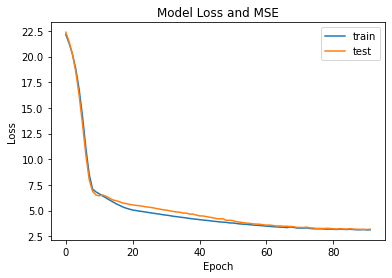

In [10]:
# Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Loss and MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

In [11]:
# Run this same data through a linear regression model. Which achieves higher accuracy?
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:

y_predict = model.predict(X_test_scaled)
print(f'MSE: {mse(y_test, y_predict)}')

MSE: 23.19559925642293


mse: 25.0208 - val_loss: 3.1892 - val_mse: 21.3651

My new mse 23.195 is slightly large than my val_mse

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####
from tensorflow.keras.datasets import  fashion_mnist

In [14]:
# Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# X variable types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Encode categorical labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, y_train.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000, 10))

In [15]:
# Define the Model, Complile and Fit the model

functions = ['relu', 'elu', 'selu', 'softplus', 'softsign', 'swish', 'tanh']

for activation in functions:
  model2 = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(15, activation=activation),
      Dense(10, activation='softmax')
  ])

  model2.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

  model2.fit(
      x = X_train, 
      y = y_train,
      epochs = 10,
      validation_data = (X_test, y_test)
  )

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6297 - accuracy: 0.7870 - val_loss: 0.4820 - val_accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4372 - accuracy: 0.8474 - val_loss: 0.4479 - val_accuracy: 0.8408
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4061 - accuracy: 0.8579 - val_loss: 0.4308 - val_accuracy: 0.8498
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3879 - accuracy: 0.8635 - val_loss: 0.4384 - val_accuracy: 0.8416
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8664 - val_loss: 0.4506 - val_accuracy: 0.8402
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8694 - val_loss: 0.4169 - val_accuracy: 0.8505
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3598 - accuracy: 0.8716 - val_loss: 0.4168 - val_accuracy:

In [16]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model2 = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(15, activation='relu'),
      Dense(10, activation='softmax')
  ])

model2.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model2.fit(
      x = X_train, 
      y = y_train,
      epochs = 100,
      validation_data = (X_test, y_test),
      callbacks = [stop]
  )

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6036 - accuracy: 0.7964 - val_loss: 0.4853 - val_accuracy: 0.8301
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4272 - accuracy: 0.8498 - val_loss: 0.4435 - val_accuracy: 0.8458
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3974 - accuracy: 0.8597 - val_loss: 0.4336 - val_accuracy: 0.8466
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3814 - accuracy: 0.8644 - val_loss: 0.4255 - val_accuracy: 0.8496
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3703 - accuracy: 0.8684 - val_loss: 0.4127 - val_accuracy: 0.8557


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

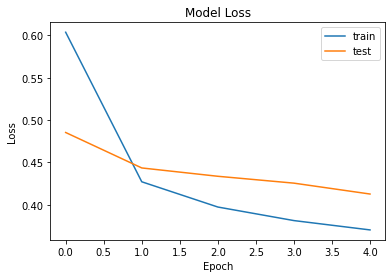

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

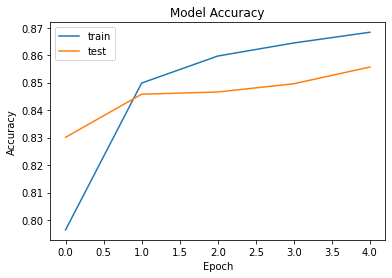

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.